In [1]:
import os, sys
import subprocess
import json
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
from coffea import processor, util, hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from boostedhiggs import VBFArrayProcessor

In [3]:
year = "2018"
name = "templates"

with open('xsec.json') as f:
    xs = json.load(f)

with open('pmap.json') as f:
    pmap = json.load(f)
    
with open('lumi.json') as f:
    lumis = json.load(f)

indir = "outfiles-n2ddt/"
infiles = subprocess.getoutput("ls "+indir+year+"_*.coffea").split()
outsum = processor.dict_accumulator()

In [4]:
started = 0 
for filename in infiles:

    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)

        if started == 0:
            outsum[name] = out[name]
            outsum['sumw'] = out['sumw']
            started += 1
        else:
            outsum[name].add(out[name])
            outsum['sumw'].add(out['sumw'])

        del out

Loading outfiles-n2ddt/2018_dask_JetHTData.coffea


In [17]:
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}

outsum[name].scale(scale_lumi, 'dataset')
templates = outsum[name].group('dataset', hist.Cat('process', 'Process'), pmap)

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f8ae7ee7b20>
  warnings.warn(


In [18]:
templates = templates.integrate('process','data').integrate('systematic','nominal').integrate('region',['signal-ggf','signal-vbf'])

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='Jet N2DDT', ylabel='Events'>

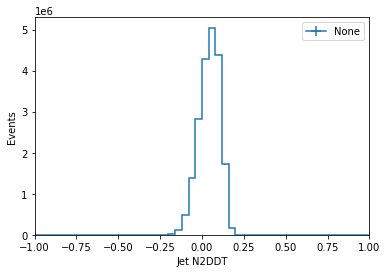

In [19]:
hist.plot1d(templates.sum('pt1','rho1','ddb1')) #.integrate('ddb1',int_range=slice(0,0.64)))
#plt.yscale('log')

In [40]:
hfail = templates.integrate('ddb1',int_range=slice(0,1)).integrate('n2ddt1',int_range=slice(0,1))
hpass = templates.integrate('ddb1',int_range=slice(0,1)).integrate('n2ddt1',int_range=slice(-1,0))
hall = templates.integrate('ddb1',int_range=slice(0,1)).integrate('n2ddt1',int_range=slice(-1,1))

<AxesSubplot:xlabel='Jet $\\rho$', ylabel='Events'>

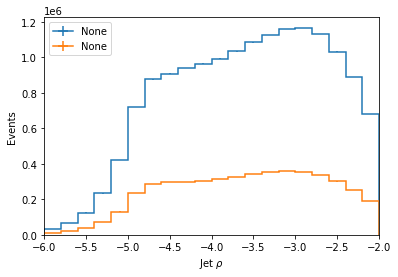

In [21]:
hist.plot1d(hfail.sum('pt1'))
hist.plot1d(hpass.sum('pt1'))

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:xlabel='Jet $p_{T}$ [GeV]', ylabel='Events'>

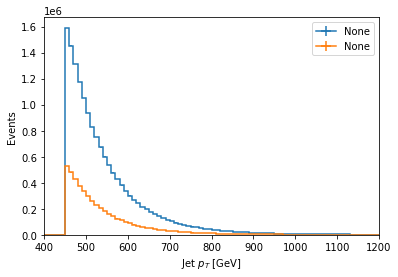

In [22]:
hist.plot1d(hfail.sum('rho1'))
hist.plot1d(hpass.sum('rho1'))

Text(0, 0.5, 'Jet $p_T$ [GeV]')

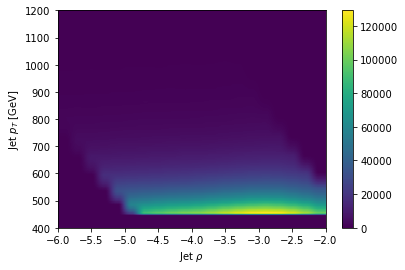

In [74]:
plt.imshow(hfail.values()[()],aspect='auto',origin='lower',extent=(-6,-2,400,1200))
plt.colorbar()
plt.xlabel(r'Jet $\rho$')
plt.ylabel(r'Jet $p_T$ [GeV]')

Text(0, 0.5, 'Jet $p_T$ [GeV]')

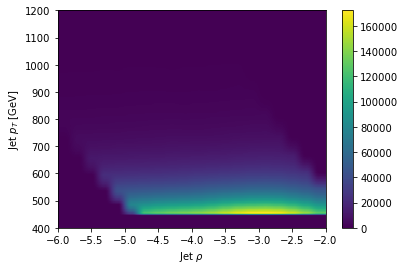

In [73]:
plt.imshow(hall.values()[()],aspect='auto',origin='lower',extent=(-6,-2,400,1200))
plt.colorbar()
plt.xlabel(r'Jet $\rho$')
plt.ylabel(r'Jet $p_T$ [GeV]')

/tmp/ipykernel_52/1532123845.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(hpass.values()[()]/(hall.values()[()]),aspect='auto',cmap='bwr',norm=divnorm, origin='lower',extent=(-6,-2,400,1200))


Text(0, 0.5, 'Jet $p_T$ [GeV]')

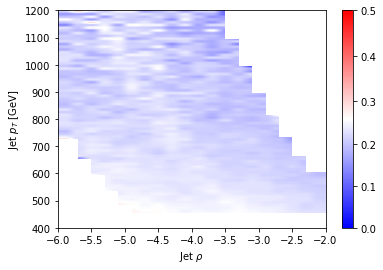

In [72]:
divnorm=colors.TwoSlopeNorm(vmin=0, vcenter=0.26, vmax=0.5)

plt.imshow(hpass.values()[()]/(hall.values()[()]),aspect='auto',cmap='bwr',norm=divnorm, origin='lower',extent=(-6,-2,400,1200))
plt.colorbar()
plt.xlabel(r'Jet $\rho$')
plt.ylabel(r'Jet $p_T$ [GeV]')

/tmp/ipykernel_52/3111036563.py:1: RuntimeWarning: invalid value encountered in true_divide
  vals = (hpass.values()[()]/hfail.values()[()]-0.26).flatten()


(array([  1.,   2.,   8.,  46., 174., 489., 359.,  84.,   6.,   3.]),
 array([-0.18857143, -0.15196429, -0.11535714, -0.07875   , -0.04214286,
        -0.00553571,  0.03107143,  0.06767857,  0.10428571,  0.14089286,
         0.1775    ]),
 <BarContainer object of 10 artists>)

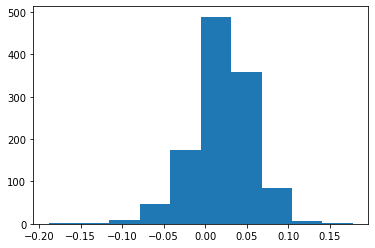

In [28]:
vals = (hpass.values()[()]/hfail.values()[()]-0.26).flatten()
plt.hist(vals)